*** Image Compression using SVD - a demo


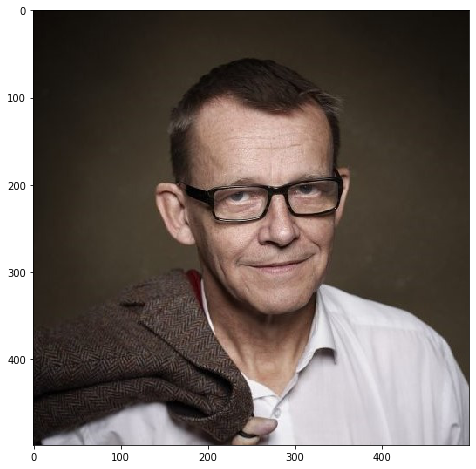

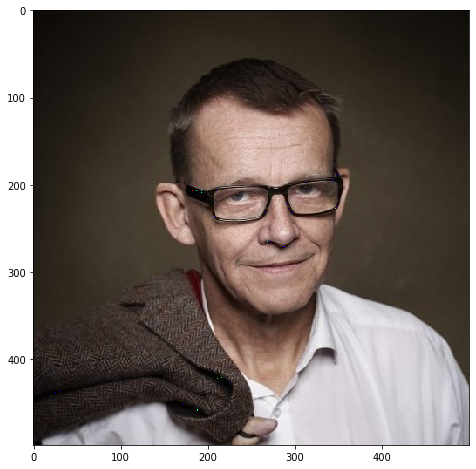

In [82]:
import numpy
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from skimage.metrics import structural_similarity as ssim

# FUNCTION DEFINTIONS:

# open the image and return 3 matrices, each corresponding to one channel (R, G and B channels)
def openImage(imagePath):
    imOrig = Image.open(imagePath)
    im = numpy.array(imOrig)

    aRed = im[:, :, 0]
    aGreen = im[:, :, 1]
    aBlue = im[:, :, 2]

    return [aRed, aGreen, aBlue, imOrig]

# compress the matrix of a single channel
def compressSingleChannel(channelDataMatrix, singularValuesLimit):
    uChannel, sChannel, vhChannel = numpy.linalg.svd(channelDataMatrix)
    aChannelCompressed = numpy.zeros((channelDataMatrix.shape[0], channelDataMatrix.shape[1]))
    k = singularValuesLimit

    leftSide = numpy.matmul(uChannel[:, 0:k], numpy.diag(sChannel)[0:k, 0:k])
    aChannelCompressedInner = numpy.matmul(leftSide, vhChannel[0:k, :])
    aChannelCompressed = aChannelCompressedInner.astype('uint8')
    return aChannelCompressed


# MAIN PROGRAM:
print('*** Image Compression using SVD - a demo')
aRed, aGreen, aBlue, originalImage = openImage('HansRosling.jpg')

# image width and height:
imageWidth = 500
imageHeight = 499

# number of singular values to use for reconstructing the compressed image
singularValuesLimit = 200

aRedCompressed = compressSingleChannel(aRed, singularValuesLimit)
aGreenCompressed = compressSingleChannel(aGreen, singularValuesLimit)
aBlueCompressed = compressSingleChannel(aBlue, singularValuesLimit)

imr = Image.fromarray(aRedCompressed, mode=None)
img = Image.fromarray(aGreenCompressed, mode=None)
imb = Image.fromarray(aBlueCompressed, mode=None)

newImage = Image.merge("RGB", (imr, img, imb))
plt.rcParams['figure.figsize']=[16,8]
plt.imshow(originalImage)
plt.show()
plt.imshow(newImage)
plt.show()

#originalImage.show()
#newImage.show()

originalImage.size
newImage.save("C:\\Users\\ASUS\\Desktop\\HansRosling-new.jpeg")

In [83]:
# CALCULATE AND DISPLAY THE COMPRESSION RATIO
mr = imageHeight
mc = imageWidth

originalSize = mr * mc * 3
compressedSize = singularValuesLimit * (1 + mr + mc) * 3

print('original size:')
print(originalSize)

print('compressed size:')
print(compressedSize)

print('Ratio compressed size / original size:')
ratio = compressedSize * 1.0 / originalSize
print(ratio)

print('Compressed image size is ' + str(round(ratio * 100, 2)) + '% of the original image ')
print('DONE - Compressed the image! Over and out!')

print(originalImage.size)
print(newImage.size)

original size:
748500
compressed size:
600000
Ratio compressed size / original size:
0.8016032064128257
Compressed image size is 80.16% of the original image 
DONE - Compressed the image! Over and out!
(500, 499)
(500, 499)


In [84]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

def compare_images(originalImage, newImage, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(originalImage, newImage)
	s = ssim(originalImage, newImage)
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(originalImage, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(newImage, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()    

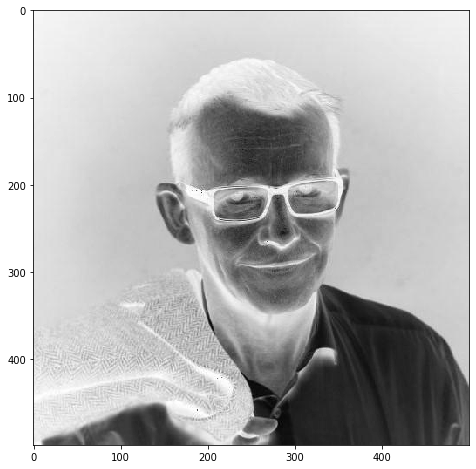

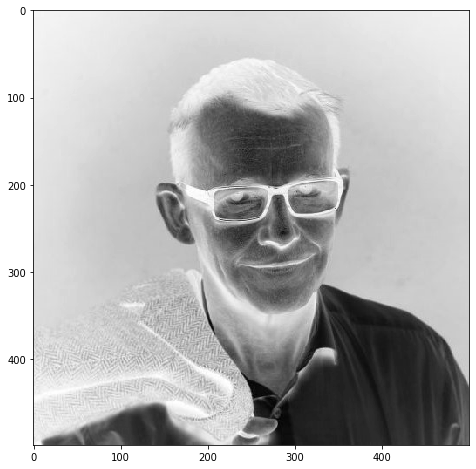

In [85]:
pic = Image.open("HansRosling-new.jpeg")
X= np.mean(pic,-1)
img= plt.imshow(500-X)
img.set_cmap('gray')
plt.show()

pic1 = Image.open("HansRosling.jpg")
X1= np.mean(pic1,-1)
img1= plt.imshow(500-X1)
img1.set_cmap('gray')
plt.show()

In [86]:
import PIL 
I = numpy.asarray(PIL.Image.open('HansRosling-new.jpeg'))
P = numpy.asarray(PIL.Image.open('HansRosling.jpg'))
print(P)

[[[ 13   9   6]
  [ 13   9   6]
  [ 13   9   6]
  ...
  [ 17  13  10]
  [ 17  13  10]
  [ 17  13  10]]

 [[ 13   9   6]
  [ 13   9   6]
  [ 13   9   6]
  ...
  [ 17  13  10]
  [ 17  13  10]
  [ 17  13  10]]

 [[ 13   9   6]
  [ 13   9   6]
  [ 13   9   6]
  ...
  [ 17  13  10]
  [ 17  13  10]
  [ 17  13  10]]

 ...

 [[ 17  15  16]
  [ 16  14  15]
  [ 14  12  13]
  ...
  [152 151 159]
  [147 146 154]
  [142 141 149]]

 [[ 17  15  16]
  [ 16  14  15]
  [ 14  12  13]
  ...
  [152 151 159]
  [147 146 154]
  [142 141 149]]

 [[ 17  15  16]
  [ 16  14  15]
  [ 14  12  13]
  ...
  [152 151 159]
  [147 146 154]
  [142 141 149]]]


In [87]:
print(I)

print(mse(P, I))

[[[ 13   9   6]
  [ 13   9   6]
  [ 13   9   6]
  ...
  [ 17  13  10]
  [ 17  13  10]
  [ 17  13  10]]

 [[ 13   9   6]
  [ 13   9   6]
  [ 13   9   6]
  ...
  [ 17  13  10]
  [ 17  13  10]
  [ 17  13  10]]

 [[ 13   9   6]
  [ 13   9   6]
  [ 13   9   6]
  ...
  [ 17  13  10]
  [ 17  13  10]
  [ 17  13  10]]

 ...

 [[ 16  15  13]
  [ 15  14  12]
  [ 14  13  11]
  ...
  [150 148 159]
  [145 143 154]
  [142 140 151]]

 [[ 16  15  13]
  [ 15  14  12]
  [ 14  13  11]
  ...
  [151 149 160]
  [145 143 154]
  [142 140 151]]

 [[ 16  15  13]
  [ 15  14  12]
  [ 14  13  11]
  ...
  [151 149 160]
  [146 144 155]
  [142 140 151]]]
25.42743486973948


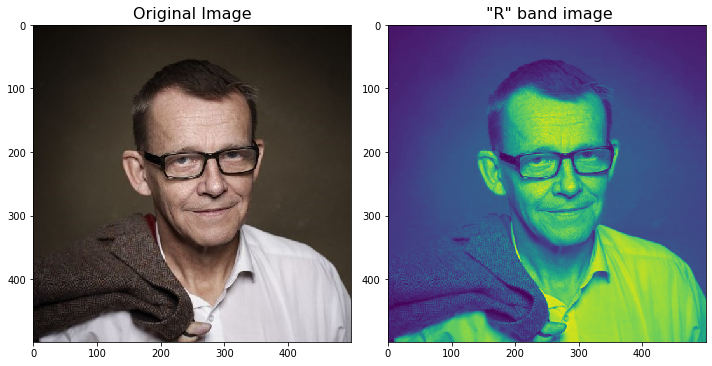

In [88]:
img = Image.open("HansRosling.jpg")
red_band =img.getdata(band=0)
# convert to numpy array 
img_mat = np.array(list(red_band), float) 
img_mat.size
# get image shape
img_mat.shape = (img.size[1], img.size[0])
# conver to 1d-array to matrix
img_mat = np.matrix(img_mat)
img_mat
fig, axs = plt.subplots(1, 2,figsize=(10,10))
axs[0].imshow(img)
axs[0].set_title('Original Image', size=16)
axs[1].imshow(img_mat)
axs[1].set_title(' "R" band image', size=16)
plt.tight_layout()
#plt.savefig('Original_image_and_R_band_image_for_SVD.jpg',dpi=150)

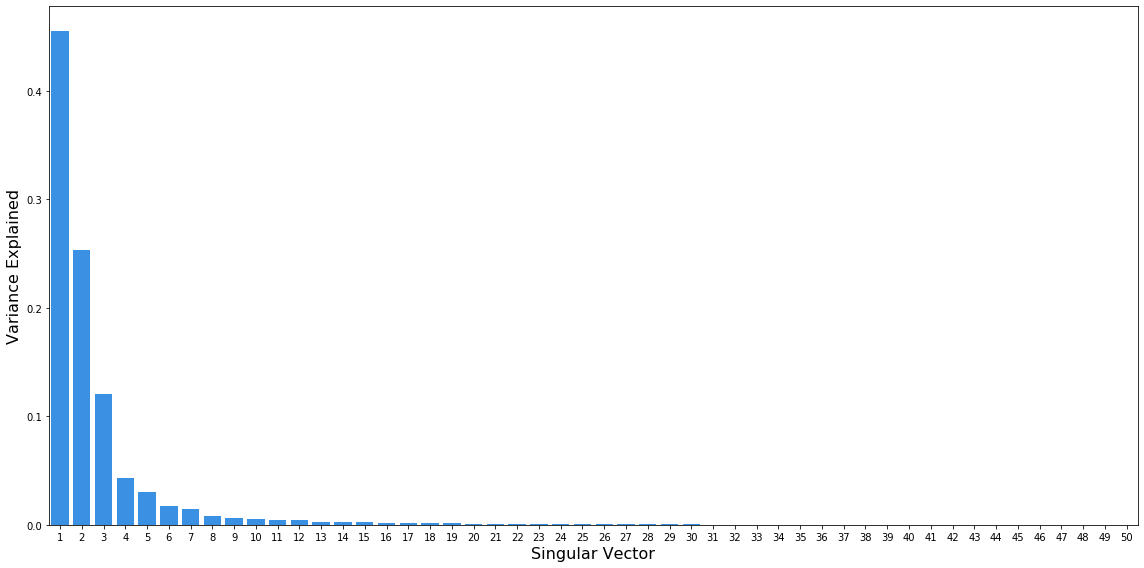

In [89]:
# scale the image matrix befor SVD
img_mat_scaled= (img_mat-img_mat.mean())/img_mat.std()
# Perform SVD using np.linalg.svd
U, s, V = np.linalg.svd(img_mat_scaled) 
U.shape
V.shape
s

# Compute Variance explained by each singular vector
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
# Variance explained top Singular vectors
var_explained[0:50]
sns.barplot(x=list(range(1,51)),
            y=var_explained[0:50], color="dodgerblue")
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()


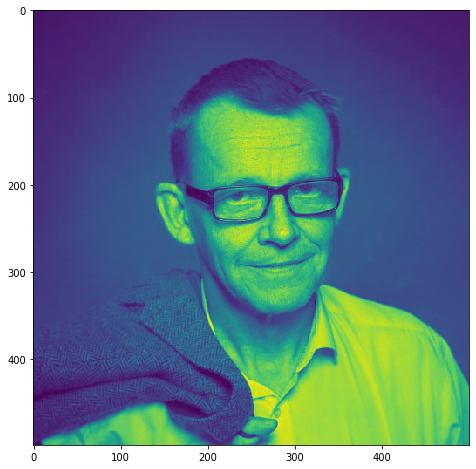

In [90]:
#plt.savefig('svd_scree_plot.png',dpi=150, figsize=(8,6))
#plt.savefig("Line_Plot_with_Pandas_Python.jpg")

##Reconstructing Image with top-K Singular vectors
num_components = 200
reconst_img_5 = np.matrix(U[:, :num_components]) * np.diag(s[:num_components]) * np.matrix(V[:num_components, :])
plt.imshow(reconst_img_5)
#plt.savefig('reconstructed_image_with_5_SVs.png',dpi=150, figsize=(8,6))